In [4]:
from IPython.display import clear_output
import SALib
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from model import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import time
import copy
%matplotlib inline

In [8]:
problem = {
    'num_vars': 6,
    'names': [
     'max_eff', 
     'eutax',
     'neighbor_influence',
     'tax_influence',
     'member_trade_multiplier',
     'tax_distribution'],
    #'bounds': [[0, 2], [0.1, 0.6], [0, 0.2], [0, 0.2], [0.9, 2], [0.8, 1.2]]
    'bounds': [[0, 5], [0, 1], [0, 1], [0, 1], [0.1, 5], [0.1, 3]]
}

#international_trade, max_eff, eutax, neighbor_influence,
#tax_influence, member_trade_multiplier, randomness, eu_strategy):
# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 1
max_steps = 5
distinct_samples = 800

# Set the outputs

# We get all our samples here
param_values = saltelli.sample(problem, distinct_samples, calc_second_order= False)
# READ NOTE BELOW CODE

count = 0
samples = pd.DataFrame(data=param_values,
                       columns=[ 'max_eff', 'eutax','neighbor_influence',
                                'tax_influence','member_trade_multiplier','tax_distribution'])

samples.to_csv('out.csv')

In [9]:
samples

,max_eff,eutax,neighbor_influence,tax_influence,member_trade_multiplier,tax_distribution
0,1.098633,0.096680,0.518555,0.676758,1.473340,2.730957
1,0.229492,0.096680,0.518555,0.676758,1.473340,2.730957
2,1.098633,0.899414,0.518555,0.676758,1.473340,2.730957
3,1.098633,0.096680,0.500977,0.676758,1.473340,2.730957
4,1.098633,0.096680,0.518555,0.069336,1.473340,2.730957
...,...,...,...,...,...,...
6395,0.646973,0.998535,0.230957,0.917480,0.643115,0.681982
6396,0.646973,0.998535,0.294434,0.785645,0.643115,0.681982
6397,0.646973,0.998535,0.294434,0.917480,4.935400,0.681982
6398,0.646973,0.998535,0.294434,0.917480,0.643115,2.746533


In [22]:
problem = {
    'num_vars': 6,
    'names': [
     'max_eff', 
     'eutax',
     'neighbor_influence',
     'tax_influence',
     'member_trade_multiplier',
     'tax_distribution'],
    'bounds': [[0, 2], [0.1, 0.6], [0, 0.2], [0, 0.2], [0.9, 2], [0.8, 1.2]]
}
data = pd.read_csv('data_int_off.csv')
print(data.columns)
#data = data['Run'].unique()

data = data.loc[data['international_trade'] == False]
data = data.drop_duplicates(subset=['Run'])
data.loc[data.gini_coefficient > 1, 'gini_coefficient'] = 1
data.reindex()

Index(['Run', 'international_trade', 'max_eff', 'eutax', 'neighbor_influence',
       'tax_influence', 'member_trade_multiplier', 'tax_distribution',
       'member_count', 'other_count', 'average_cooperativeness',
       'other_wealth', 'total_wealth', 'member_wealth', 'other_eff',
       'total_eff', 'member_eff', 'gini_coefficient',
       'stdev_agent_cooperativeness'],
      dtype='object')


,Run,international_trade,max_eff,eutax,neighbor_influence,tax_influence,member_trade_multiplier,tax_distribution,member_count,other_count,average_cooperativeness,other_wealth,total_wealth,member_wealth,other_eff,total_eff,member_eff,gini_coefficient,stdev_agent_cooperativeness
0,4656,False,1.223633,0.139307,0.027246,0.172949,1.930713,0.832617,179.0,141.0,0.119061,35067.971926,29823.045405,25691.566972,2.474606,1.542380,0.808057,0.211905,0.985836
1,5238,False,1.395508,0.276025,0.094434,0.165137,1.526807,0.875195,83.0,237.0,-0.481250,31604.939609,27911.452068,17364.987645,2.167158,1.719673,0.441916,0.400277,0.876583
2,2619,False,0.233398,0.435693,0.068652,0.183691,1.850146,0.849414,320.0,0.0,1.000000,0.000000,35615.459064,35615.459064,0.000000,1.516808,1.516808,0.001380,0.000000
3,5529,False,0.543945,0.406885,0.104590,0.131543,1.470947,0.821680,74.0,246.0,-0.532363,27354.180285,26431.771615,23365.386036,1.716316,1.512382,0.834438,0.134400,0.838820
4,2910,False,0.749023,0.478662,0.141504,0.107129,1.893115,0.809961,277.0,43.0,0.735052,26092.948678,34647.152312,35975.061180,1.629461,1.545182,1.532099,0.080869,0.646111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,3198,False,0.405273,0.548975,0.125879,0.179004,1.600928,1.028711,1.0,319.0,-0.993750,25538.908712,25593.676530,43064.610447,1.530513,1.534572,2.829359,0.185282,0.111629
6396,1744,False,1.541992,0.137842,0.134082,0.171582,0.967139,1.111133,0.0,320.0,-1.000000,27969.518045,27969.518045,0.000000,1.783660,1.783660,0.000000,0.461169,0.000000
6397,3199,False,0.362305,0.193506,0.076465,0.019824,1.488135,1.028711,218.0,102.0,0.354377,25313.565051,46501.568992,56415.222212,1.560111,1.526659,1.511007,1.000000,0.922648
6398,1745,False,0.084961,0.137842,0.134082,0.171582,0.967139,1.111133,0.0,320.0,-1.000000,24651.436119,24651.436119,0.000000,1.505555,1.505555,0.000000,0.050983,0.000000


In [23]:
S_i_gini = sobol.analyze(problem, data['gini_coefficient'].values, print_to_console=True, calc_second_order=False, num_resamples= 800)
print(S_i_gini)

Parameter S1 S1_conf ST ST_conf
max_eff -0.031001 0.098373 1.011500 0.086438
eutax -0.084756 0.101759 1.013602 0.081192
neighbor_influence -0.053559 0.097574 0.946920 0.079503
tax_influence -0.007071 0.098450 1.046804 0.087082
member_trade_multiplier -0.086956 0.095717 1.028393 0.088473
tax_distribution -0.001428 0.097513 0.972470 0.081966
{'S1': array([-0.03100122, -0.08475607, -0.0535592 , -0.00707071, -0.08695642,
       -0.0014277 ]), 'S1_conf': array([0.09837259, 0.10175875, 0.09757378, 0.09845025, 0.09571659,
       0.09751259]), 'ST': array([1.01149956, 1.01360189, 0.94691988, 1.04680448, 1.02839264,
       0.97247031]), 'ST_conf': array([0.08643767, 0.08119208, 0.07950277, 0.08708218, 0.08847277,
       0.08196556])}


In [24]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        print('S' + i)
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

S1


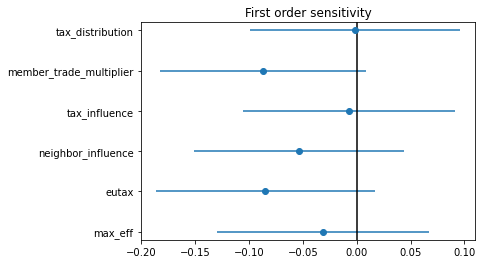

ST


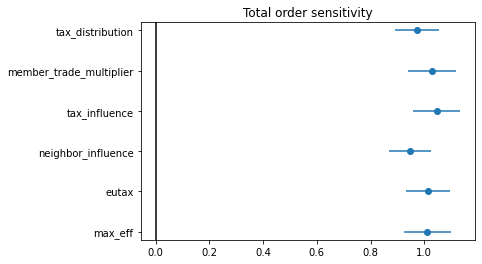

In [25]:
for Si in [S_i_gini]:
    # First order
    plot_index(Si, problem['names'], '1', 'First order sensitivity')
    plt.show()

    # Total order
    plot_index(Si, problem['names'], 'T', 'Total order sensitivity')
    plt.show()